# Test Time Series DL


In [49]:
# Import 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.ar_model import AutoReg



In [50]:
# Dataset
df = yf.download("AAPL", start="2020-01-01", end="2024-12-31")

# Returns
df["return"] = df["Close"].pct_change()

# Log-returns
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))

df = df.dropna()


/var/folders/vp/6wb8xsys5v93hnh1zt4zdj5w0000gn/T/ipykernel_84811/3797639588.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [51]:
df.head()

Price,Close,High,Low,Open,Volume,return,log_return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-03,71.763718,72.523746,71.539330,71.696160,146322800,-0.009722,-0.009770
2020-01-06,72.335548,72.374154,70.634532,70.885464,118387200,0.007968,0.007937
2020-01-07,71.995361,72.600968,71.775796,72.345212,108872000,-0.004703,-0.004714
2020-01-08,73.153481,73.455080,71.698566,71.698566,132079200,0.016086,0.015958
2020-01-09,74.707344,74.900365,73.879757,74.130683,170108400,0.021241,0.021019


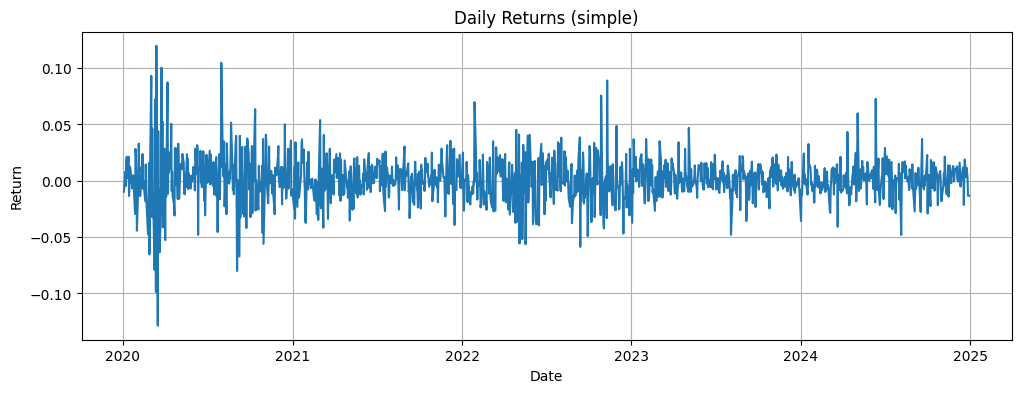

In [52]:
plt.figure(figsize=(12,4))
plt.plot(df["return"])
plt.title("Daily Returns (simple)")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.show()


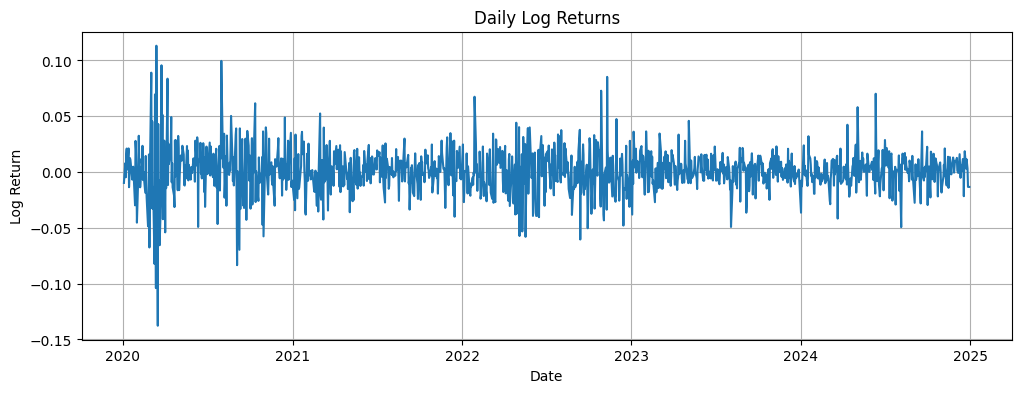

In [53]:
plt.figure(figsize=(12,4))
plt.plot(df["log_return"])
plt.title("Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.show()


In [54]:

# AR(1)
model_ar1 = AutoReg(returns, lags=1).fit()
print(model_ar1.summary())

# Forecast 10 jours
forecast_ar1 = model_ar1.forecast(steps=10)
print(forecast_ar1)


                            AutoReg Model Results                             
Dep. Variable:             log_return   No. Observations:                 1256
Model:                     AutoReg(1)   Log Likelihood                3140.234
Method:               Conditional MLE   S.D. of innovations              0.020
Date:                Wed, 03 Dec 2025   AIC                          -6274.468
Time:                        11:22:40   BIC                          -6259.063
Sample:                             1   HQIC                         -6268.678
                                 1256                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.001      1.982      0.048    1.21e-05       0.002
log_return.L1    -0.1120      0.028     -3.994      0.000      -0.167      -0.057
                                    Root

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set wil

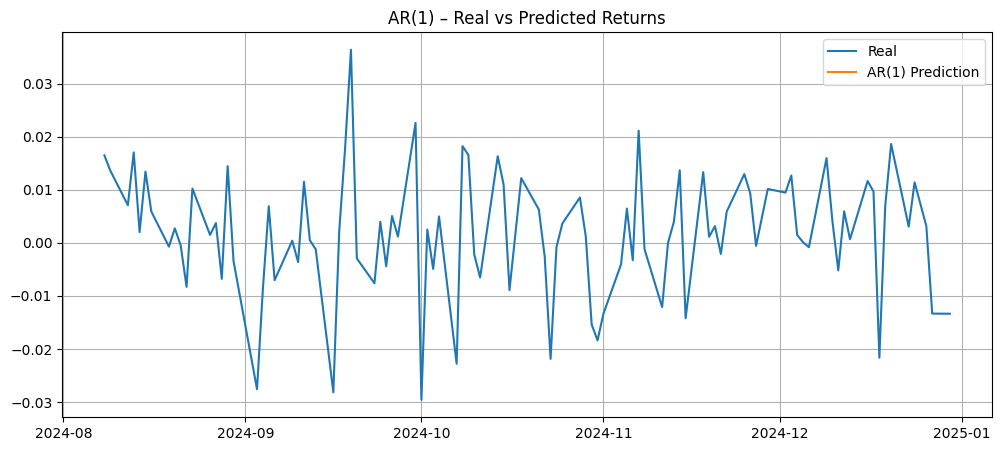

In [55]:
# Forecast last 100 points (rolling forecast)
steps = 100
pred_ar1 = model_ar1.predict(start=len(returns)-steps, end=len(returns)-1)

# Plot
plt.figure(figsize=(12,5))
plt.plot(returns[-steps:], label="Real")
plt.plot(pred_ar1, label="AR(1) Prediction")
plt.title("AR(1) – Real vs Predicted Returns")
plt.legend()
plt.grid(True)
plt.show()


In [56]:
p = 5  # exemple AR(5)

model_arp = AutoReg(returns, lags=p).fit()
print(model_arp.summary())

forecast_arp = model_arp.forecast(steps=10)
print(forecast_arp)


                            AutoReg Model Results                             
Dep. Variable:             log_return   No. Observations:                 1256
Model:                     AutoReg(5)   Log Likelihood                3130.638
Method:               Conditional MLE   S.D. of innovations              0.020
Date:                Wed, 03 Dec 2025   AIC                          -6247.276
Time:                        11:22:40   BIC                          -6211.354
Sample:                             5   HQIC                         -6233.772
                                 1256                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0011      0.001      1.878      0.060   -4.62e-05       0.002
log_return.L1    -0.1109      0.028     -3.925      0.000      -0.166      -0.056
log_return.L2     0.0072      0.028     

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set wil

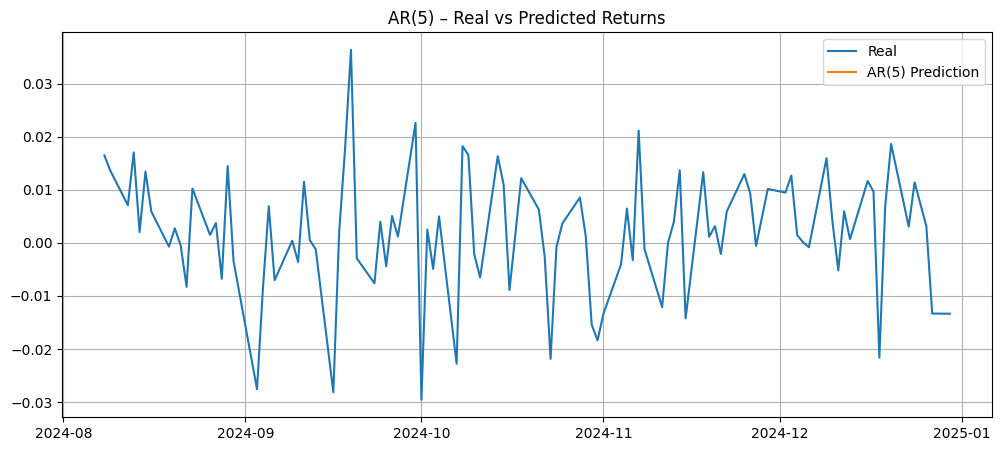

In [57]:
steps = 100
pred_arp = model_arp.predict(start=len(returns)-steps, end=len(returns)-1)

plt.figure(figsize=(12,5))
plt.plot(returns[-steps:], label="Real")
plt.plot(pred_arp, label=f"AR({p}) Prediction")
plt.title(f"AR({p}) – Real vs Predicted Returns")
plt.legend()
plt.grid(True)
plt.show()


In [58]:
from statsmodels.tsa.arima.model import ARIMA

# Exemple : ARIMA(1,0,1)

p, d, q = 1, 0, 1

model_arima = ARIMA(returns, order=(1, 0, 1)).fit()
print(model_arima.summary())

forecast_arima = model_arima.forecast(steps=10)
print(forecast_arima)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:             log_return   No. Observations:                 1256
Model:                 ARIMA(1, 0, 1)   Log Likelihood                3143.142
Date:                Wed, 03 Dec 2025   AIC                          -6278.283
Time:                        11:22:40   BIC                          -6257.741
Sample:                             0   HQIC                         -6270.562
                               - 1256                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      1.899      0.058   -3.17e-05       0.002
ar.L1         -0.1951      0.151     -1.291      0.197      -0.491       0.101
ma.L1          0.0843      0.157      0.536      0.5

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


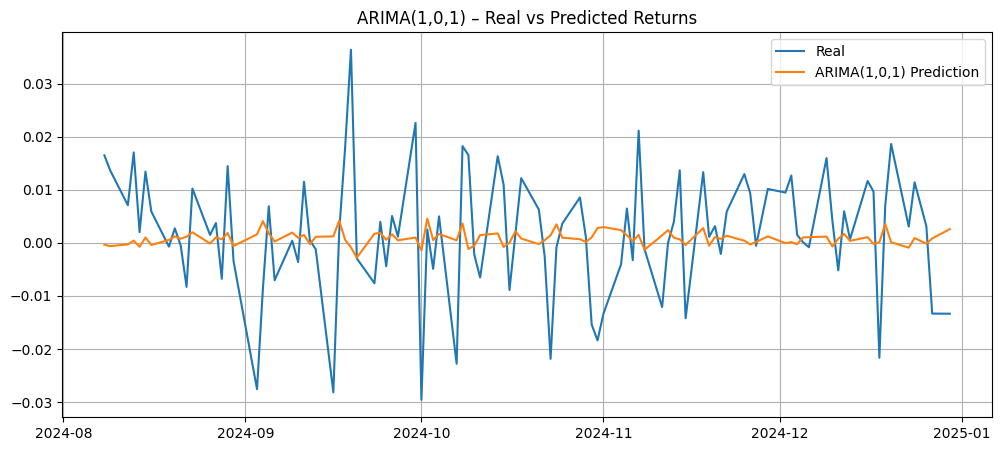

In [59]:
steps = 100
pred_arima = model_arima.predict(start=len(returns)-steps, end=len(returns)-1)

plt.figure(figsize=(12,5))
plt.plot(returns[-steps:], label="Real")
plt.plot(pred_arima, label=f"ARIMA({p},{d},{q}) Prediction")
plt.title(f"ARIMA({p},{d},{q}) – Real vs Predicted Returns")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# ------------------------------
# 1. Télécharger les données
# ------------------------------
df = yf.download("AAPL", start="2020-01-01", end="2024-12-31")

# Log-returns
df["log_return"] = np.log(df["Close"] / df["Close"].shift(1))
df = df.dropna()

returns = df["log_return"]

# ------------------------------
# 2. Rolling forecast Auto-ARIMA
# ------------------------------
steps = 100  # nombre de points à prédire

# On commence avec toute l'histoire sauf les derniers steps
history = returns[:-steps].tolist()
pred_rolling = []

for t in range(steps):
    # Auto ARIMA sur l'historique actuelle
    model = auto_arima(history, seasonal=False, stepwise=True, suppress_warnings=True)
    
    # Prédiction du prochain point
    next_pred = model.predict(n_periods=1)[0]
    pred_rolling.append(next_pred)
    
    # Mise à jour de l'historique avec la vraie valeur (pour in-sample forecast)
    history.append(returns[-steps + t])  

# Convertir en Series pour plot
pred_rolling_series = pd.Series(pred_rolling, index=returns.index[-steps:])

# ------------------------------
# 3. Plot
# ------------------------------
plt.figure(figsize=(12,5))
plt.plot(returns[-steps:], label="Real Log Returns")
plt.plot(pred_rolling_series, label="Rolling Auto ARIMA Prediction")
plt.title("Rolling Forecast Auto-ARIMA – Real vs Predicted Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.show()


/var/folders/vp/6wb8xsys5v93hnh1zt4zdj5w0000gn/T/ipykernel_84811/3418441848.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
